In [7]:

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [8]:

ticker = 'INFY'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']
data.head()

,INFY
Date,
2010-01-04,5.487742
2010-01-05,5.509014
2010-01-06,5.424899
2010-01-07,5.259570
2010-01-08,5.273107


In [9]:
data['INFY'].dtype

dtype('float64')

In [10]:
data.isna().sum()

INFY    0
dtype: int64

In [11]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

,INFY
Date,
2010-01-04,NaN
2010-01-05,0.003869
2010-01-06,-0.015386
2010-01-07,-0.030950
2010-01-08,0.002570


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

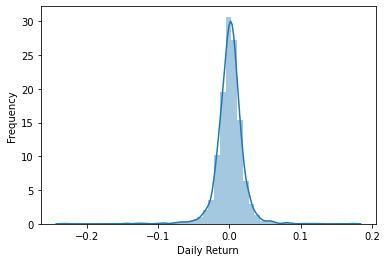

In [12]:
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

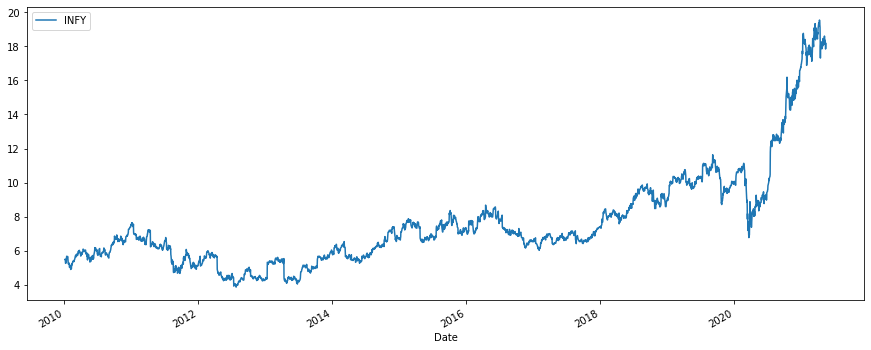

In [13]:

data.plot(figsize=(15,6))

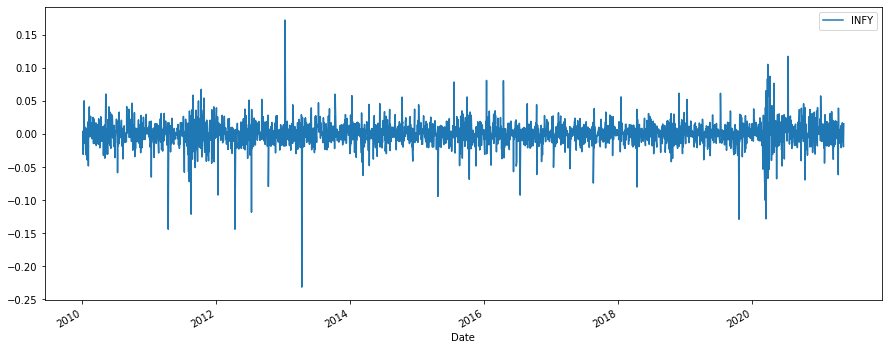

In [14]:
log_returns.plot(figsize=(15,6))


In [15]:
u = log_returns.mean()
var = log_returns.var()


In [16]:
drift = u - (0.09*var)
drift

INFY    0.000386
dtype: float64

In [17]:
x = np.random.rand(10,2)
x

array([[0.51299182, 0.77463285],
       [0.36412304, 0.70562283],
       [0.18242425, 0.72629088],
       [0.74087272, 0.46682297],
       [0.51246291, 0.50361759],
       [0.64231477, 0.6279261 ],
       [0.88153706, 0.30084894],
       [0.40636705, 0.30620386],
       [0.48755068, 0.18221261],
       [0.42584426, 0.39620419]])

In [18]:
norm.ppf(x)

array([[ 0.03257142,  0.7541914 ],
       [-0.34745958,  0.54064204],
       [-0.90616505,  0.60163332],
       [ 0.64603829, -0.08325858],
       [ 0.03124497,  0.00906809],
       [ 0.36465299,  0.32636555],
       [ 1.18270552, -0.52196044],
       [-0.23690034, -0.5066396 ],
       [-0.03121087, -0.90696518],
       [-0.18696443, -0.26318449]])

In [19]:
stddev = log_returns.std()


In [20]:

Z = norm.ppf(np.random.rand(50,10000))
Z

array([[ 0.60328563,  0.48245918,  0.77900435, ..., -1.22053279,
         0.73039239, -0.96259007],
       [ 0.38497539,  0.46049741, -0.46395227, ..., -0.31765682,
        -0.98842459, -0.55852403],
       [ 1.86599675, -1.79670498,  0.34226504, ..., -0.2276742 ,
         1.27238996, -0.86984575],
       ...,
       [ 0.75944454,  3.53238659,  0.37082749, ..., -0.74558855,
        -0.18661288,  1.37516364],
       [ 0.35421331, -0.35119441,  0.57653933, ...,  0.87557696,
        -0.42856269,  1.72561326],
       [-0.83946069, -0.62812622,  1.02293026, ...,  0.99559541,
        -0.03294948,  0.758212  ]])

In [21]:

t_intervals = 1000
iterations = 10

In [22]:
daily_returns= np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))


In [23]:
daily_returns


array([[1.00986067, 0.99706295, 1.03382473, ..., 0.97335671, 1.01519858,
        0.96681059],
       [0.96922847, 1.02639913, 1.02184966, ..., 0.99891855, 1.03540988,
        0.97698088],
       [0.99031945, 0.98862395, 1.01277533, ..., 0.97581835, 0.95918064,
        0.99141437],
       ...,
       [1.0013817 , 0.98764544, 0.97862079, ..., 1.02580264, 1.00066743,
        1.01531791],
       [0.95540092, 1.02346355, 0.99657011, ..., 1.00277415, 0.98667058,
        0.99313727],
       [0.99734177, 1.00692404, 1.00967738, ..., 1.01598197, 0.98302119,
        1.02826937]])

In [24]:

S0 = data.iloc[-1] #It will show the last update price of Amazon Share which is on Friday 14 May
S0

INFY    18.16
Name: 2021-05-14 00:00:00, dtype: float64

In [25]:
price_list = np.zeros_like(daily_returns)


In [26]:

price_list.shape


(50, 1000)

In [27]:
price_list[0] = S0
price_list


array([[18.15999985, 18.15999985, 18.15999985, ..., 18.15999985,
        18.15999985, 18.15999985],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [28]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [29]:

price_list.shape

(50, 1000)

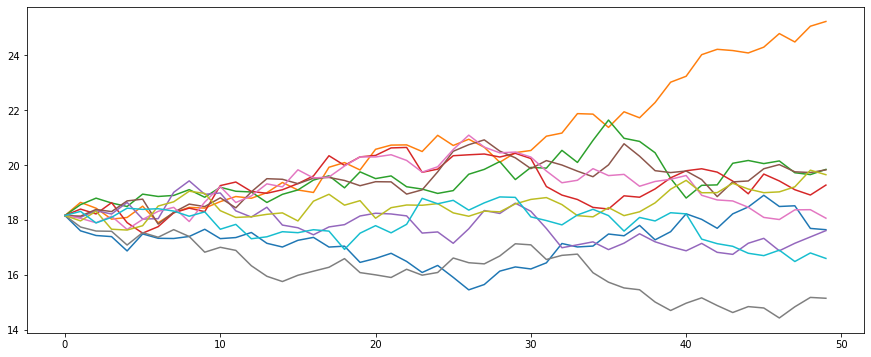

In [30]:

plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price after 50 days')

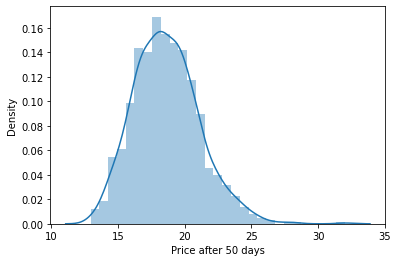

In [31]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Price after 50 days")

#SIMPLE RETURNS

In [32]:
#log_returns = np.log(df1.pct_change())
#log_returns.head(50)
simple_returns=((data/data.shift(1))-1)
simple_returns.head(15)


,INFY
Date,
2010-01-04,NaN
2010-01-05,0.003876
2010-01-06,-0.015269
2010-01-07,-0.030476
2010-01-08,0.002574
2010-01-11,0.005317
2010-01-12,0.051432
2010-01-13,0.015785
2010-01-14,0.003245


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'perf_data.time')

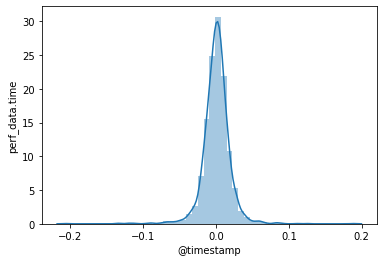

In [33]:
sns.distplot(simple_returns.iloc[1:])
plt.xlabel("@timestamp")
plt.ylabel("perf_data.time")

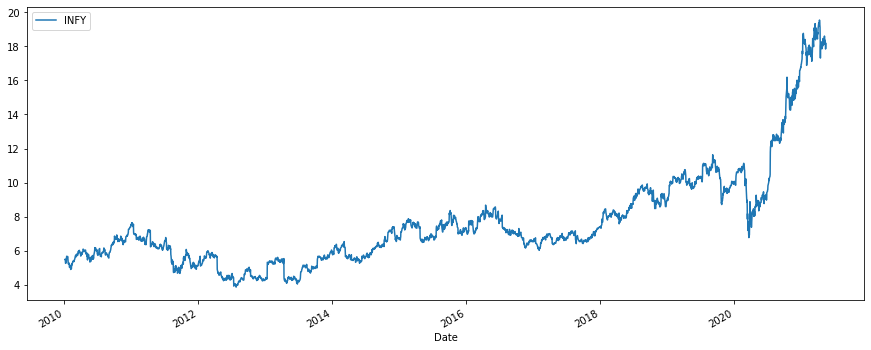

In [34]:
data.plot(figsize=(15,6))


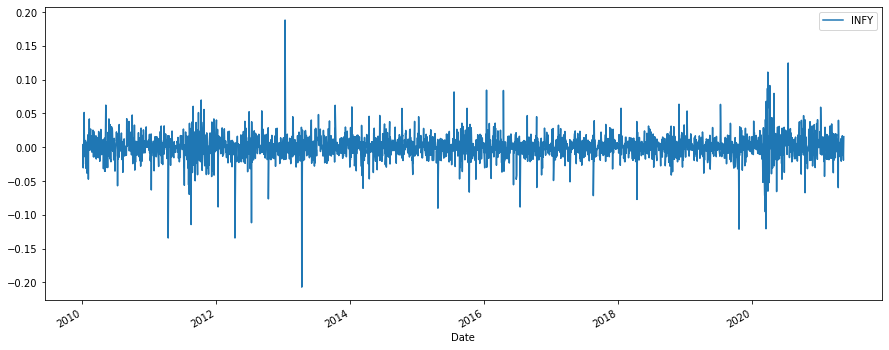

In [35]:
simple_returns.plot(figsize=(15,6)) #WE are getting descrete graph as timestamp between them was missing


In [36]:
u = simple_returns.mean()
var = simple_returns.var()

In [37]:
drift = u - (0.5*var)
drift

INFY    0.00042
dtype: float64

In [38]:
x = np.random.rand(10,2)
x

array([[0.28995016, 0.96434935],
       [0.36661047, 0.58375011],
       [0.02950706, 0.17556743],
       [0.16426357, 0.82757299],
       [0.17122163, 0.13691567],
       [0.7576989 , 0.78218179],
       [0.70776184, 0.28751464],
       [0.19241878, 0.12195843],
       [0.79990107, 0.26792622],
       [0.17725541, 0.56072767]])

In [39]:
norm.ppf(x)

array([[-0.55353034,  1.80355371],
       [-0.34084412,  0.2114966 ],
       [-1.88808818, -0.93239028],
       [-0.97708485,  0.94461785],
       [-0.94934877, -1.09428196],
       [ 0.69891972,  0.7795829 ],
       [ 0.54685796, -0.56066009],
       [-0.8690175 , -1.16525236],
       [ 0.84126793, -0.61909703],
       [-0.92587525,  0.15281438]])

In [40]:
stddev = simple_returns.std()


In [41]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[ 1.44872624, -0.77188519,  1.65772385, ..., -0.10436359,
         0.35723746, -0.43208819],
       [-1.01844754,  0.54549309, -0.01384974, ..., -0.07585473,
        -1.08299764, -0.2595436 ],
       [ 0.92121038,  0.41326252,  0.07161438, ...,  0.29615137,
        -1.48447302, -0.15626193],
       ...,
       [ 2.42806888,  0.29749502, -0.27656474, ...,  0.05812942,
        -0.23584356,  0.28559495],
       [ 1.10007754, -0.10170708, -0.05179449, ...,  0.3952446 ,
        -1.44477921,  0.34334799],
       [-0.62371771,  0.06991473, -1.62852271, ..., -1.31646126,
        -0.13581334,  0.33198555]])

In [42]:
t_intervals = 1000
iterations = 10
daily_returns= np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))
daily_returns

array([[0.98504712, 1.00694654, 0.99540441, ..., 0.99294639, 1.0121029 ,
        0.98121181],
       [1.02537915, 0.98024869, 0.98171689, ..., 0.97469316, 0.98340935,
        1.00423664],
       [0.98040537, 0.96963303, 1.00393796, ..., 1.0207624 , 0.98490088,
        1.01986163],
       ...,
       [0.95733824, 1.04184015, 1.00169272, ..., 0.99698646, 0.9722129 ,
        0.9918436 ],
       [0.99817818, 0.99239   , 0.98756757, ..., 1.00605268, 1.02318796,
        1.05172007],
       [0.96186225, 1.01912824, 0.97715477, ..., 0.99293917, 0.99721762,
        1.0244398 ]])

In [43]:
D0 = data.iloc[-1] #It will show the last update price of Amazon Share which is on Friday 14 May
D0

INFY    18.16
Name: 2021-05-14 00:00:00, dtype: float64

In [47]:
price_list = np.zeros_like(daily_returns)
price_list.shape

(50, 1000)

In [49]:
price_list[0] = D0
price_list

array([[18.15999985, 18.15999985, 18.15999985, ..., 18.15999985,
        18.15999985, 18.15999985],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [51]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*daily_returns[t]

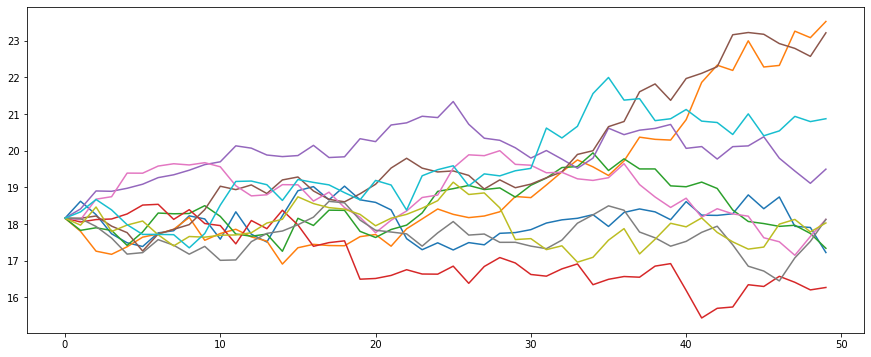

In [52]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Values of next 50 steps')

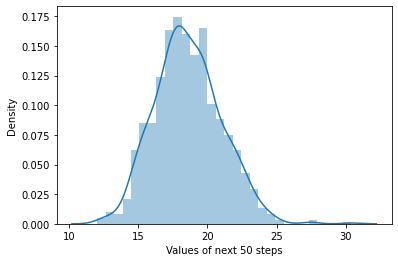

In [53]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Values of next 50 steps")